In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../src/')
from neuralnetwork import *
from analysis import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Fisher Information Matrix

## Random Initialization

In [2]:
np.random.seed(42)
x = np.random.uniform(0, np.pi, (100,5))

### Quantum Neural Network

In [3]:
backend = Aer.get_backend('qasm_simulator')
np.random.seed(42)

layer1 = QLayer(n_qubits=5, n_features=5, n_targets=5, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=2*np.pi, backend=backend, shots=100000)
layer2 = QLayer(n_qubits=5, n_features=5, n_targets=5, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=2*np.pi, backend=backend, shots=100000)
layer3 = QLayer(n_qubits=5, n_features=5, n_targets=5, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=2*np.pi, backend=backend, shots=100000)
layer4 = QLayer(n_qubits=5, n_features=5, n_targets=1, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=1, backend=backend, shots=100000)
layers = [layer1, layer2, layer3, layer4]

optimizer = Adam()
network = NeuralNetwork(layers, optimizer)

In [4]:
fim1 = FIM(network)
fim1.fit(x)
fim1.save(data_path("fim_4_depth_5_node"))

In [13]:
eigen1 = np.linalg.eig(fim1.fim)[0]
eigen1[::-1].sort()
print(eigen1.shape)

(80,)


### Classic Neural Network

In [10]:
np.random.seed(42)

layer1 = Dense(n_features=5, n_targets=5, scale = 1, activation = Sigmoid(), bias=False)
layer2 = Dense(n_features=5, n_targets=5, scale = 1, activation = Sigmoid(), bias=False)
layer3 = Dense(n_features=5, n_targets=5, scale = 1, activation = Sigmoid(), bias=False)
layer4 = Dense(n_features=5, n_targets=1, scale = 1, activation = Identity(), bias=False)
layers =[layer1, layer2, layer3, layer4]

optimizer = Adam()
network = NeuralNetwork(layers, optimizer)

In [11]:
fim2 = FIM(network)
fim2.fit(x)

In [14]:
eigen2 = np.linalg.eig(fim2.fim)[0]
eigen2[::-1].sort()
print(eigen2.shape)

(80,)


### Comparison

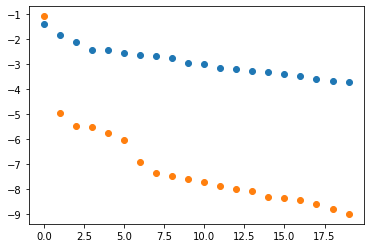

In [9]:
plt.plot(np.log10(np.abs(eigen1[:20])), "o")
plt.plot(np.log10(np.abs(eigen2[:20])), "o")
plt.show()